<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **단변량 분석 ① - 수치형**

- 수치형 변수는 크기를 비교할 수 있는 연속적인 숫자를 갖는 변수입니다.
- 예를 들어 Titanic 데이터프레임의 Age, Fare 등의 변수는 수치형 변수입니다.
- 이런 수치형 변수는 값의 분포와 평균, 최댓값, 최솟값, 중앙값 등을 확인해 분석합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/var_01.png' width=600 align='left'/>

## **1.환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 불러옵니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Titanic 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(path)

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


**📋 데이터 정보**

- PassengerId : 승객 번호
- Survived : 생존 여부(1:생존, 0:사망)
- Pclass : 객실 등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객 이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선 지역(Southampton, Cherbourg, Queenstown)

In [3]:
# AirQuality 데이터
air = pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/airquality2.csv')
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


**📋 데이터 정보**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Date: 측정 년월일

## **2. 수치화**

- 수치형 변수를 수치화해 분석할 때는 평균, 중앙값, 최빈값, 4분위수 등 대푯값을 사용합니다.
- Pandas의 **describe()** 메소드를 사용해 수치형 변수의 통계 정보를 쉽게 확인할 수 있습니다.

### **2.1. 대푯값**

- 우선 대푯값의 의미와 확인 방법을 살펴봅니다.

**1) 평균**

- 가장 대표적인 대푯값이 평균입니다.
- **mean()** 메소드로 평균을 구합니다.

In [31]:
titanic['Fare'].mean()#.round(2)

32.204207968574636

**2) 중앙값(중위수, median)**

- 데이터를 크기 순으로 나열한 상태에서 가운데 위치한 값을 중앙값이라고 합니다.
- **median()** 메소드로 중앙값을 구합니다.

In [5]:
titanic['Fare'].median()

14.4542

**3) 최빈값**

- 데이터 중에서 가장 빈번하게 나타나는 값, 즉 빈도가 가장 높은 값을 최빈값이라고 합니다.
- 같은 빈도의 값이 여럿 존재할 수 있으므로 최빈값은 여러 개 존재 할 수 있습니다.
- **mode()** 메소드로 최빈값을 확인합니다.

In [6]:
titanic['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

- 실제 최빈값은 다음과 같이 인덱스를 사용해 조회합니다.

In [7]:
titanic['Pclass'].mode()[0]

3

In [36]:
titanic['Pclass'].value_counts()#.idxmax()  -> 가장 value가 큰 값의 index를 출력

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**4) 4분위수**

- **describe()** 메소드로 4분위수를 확인할 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/quartile2.png' width=700 align="left"/>

In [8]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- 1사분위수(25%)를 Q1, 2사분위수(50%)를 Q2, 3사분위수(75%)를 Q3로 지칭합니다.
- 다음과 같이 Q1, Q2, Q3 값을 개별적으로 확인할 수 있습니다.

In [9]:
print('Q1:', titanic['Fare'].describe()['25%'])
print('Q2:', titanic['Fare'].describe()['50%'])
print('Q3:', titanic['Fare'].describe()['75%'])

Q1: 7.9104
Q2: 14.4542
Q3: 31.0


- 참고로, 4사분위수(100%)를 Q4로 지칭합니다.
- 4사분위수는 최댓값이므로 다음과 같이 Q4 값을 확인할 수 있습니다.

In [10]:
print('Q4:', titanic['Fare'].describe()['max'])

Q4: 512.3292


### **2.2. 기술통계 정보**

- 기술통계 정보를 사용해 데이터프레임의 데이터를 이해합니다.
- 데이터프레임에 대한 기술통계 정보를 **describe()** 메소드로 확인합니다.
- 기본적으로 숫자형 변수에 대한 결과만 표시됩니다.

In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


- 변수 하나에 대한 기술통계 정보를 **describe()** 메소드로 확인합니다.

In [38]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- 다음과 같이 대상 변수를 리스트 형태로 전달해 데이터프레임 형태로 결과를 표시할 수 있습니다.

In [40]:
titanic[['Age']].describe()  

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


- 다음과 같이 가로 세로 방향을 바꾸어 표시하면 내용을 이해하기가 더 쉽습니다.

In [41]:
titanic[['Age']].describe().T  # .T로 transpose

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


**🔍 해석**

- 탑승객의 나이를 의미
- 전체 데이터는 891건
- Age 변수의 데이터는 714건,  나머지는 결측치
- 탑승객 891명 중, 177명의 나이는 확인되지 않음
- 가장 어린 나이는 0.42세, 최고령자는 80세
- 탑승객 나이의 평균은 29.7세
- 탑승객의 75%는 38세 이내   
- 탑승객 중 많은 사람이 젊은 층


In [15]:
titanic[['Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


**🔍 해석**

- 탑승객의 운임에 대한 정보
- Fare 변수의 데이터는 891건으로 전체 데이터와 일치(결측치가 없음)
- 운임의 범위는 0~512 달러로, 어린 아이들은 운임을 내지 않은 것으로 보임
- 평균 운임은 32.2 달러이며, 탑승객의 75%는 31 달러 이내의 운임을 냈음
- 평균 운임이 75% 지점 운임보다 더 큰 것으로 보아, 데이터는 왼쪽으로 굉장히 치우친 분포임


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

1️⃣ air 데이터프레임의 기술통계 정보를 describe() 메소드로 확인하세요.

In [47]:
air.describe().T


,count,mean,min,25%,50%,75%,max,std
Ozone,153.0,42.052288,1.0,20.0,34.0,59.0,168.0,30.156127
Solar.R,146.0,185.931507,7.0,115.75,205.0,258.75,334.0,90.058422
Wind,153.0,9.957516,1.7,7.4,9.7,11.5,20.7,3.523001
Temp,153.0,77.882353,56.0,72.0,79.0,85.0,97.0,9.46527
Date,153,1973-07-16 00:00:00,1973-05-01 00:00:00,1973-06-08 00:00:00,1973-07-16 00:00:00,1973-08-23 00:00:00,1973-09-30 00:00:00,NaN


2️⃣ Ozone 변수만의 기술통계 정보를 describe() 메소드로 확인하세요.

In [45]:
air[['Ozone']].describe().T


,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.0,34.0,59.0,168.0


3️⃣ Temp 변수만의 기술통계 정보를 describe() 메소드로 확인하세요.

In [46]:
air[['Temp']].describe().T


,count,mean,std,min,25%,50%,75%,max
Temp,153.0,77.882353,9.46527,56.0,72.0,79.0,85.0,97.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **3.시각화**

- 수치형 변수는 우선 값의 분포를 확인해야 합니다.
- 값 분포를 확인하는 방법으로 Histogram, Density Plot, Box Plot이 대표적입니다.

### **3.1. Histogram**

- Histogram은 데이터 분포를 확인하는 가장 기본적인 시각화 도구입니다.
- **Matplotlib**의 **hist()** 함수로 Histogram을 그립니다.

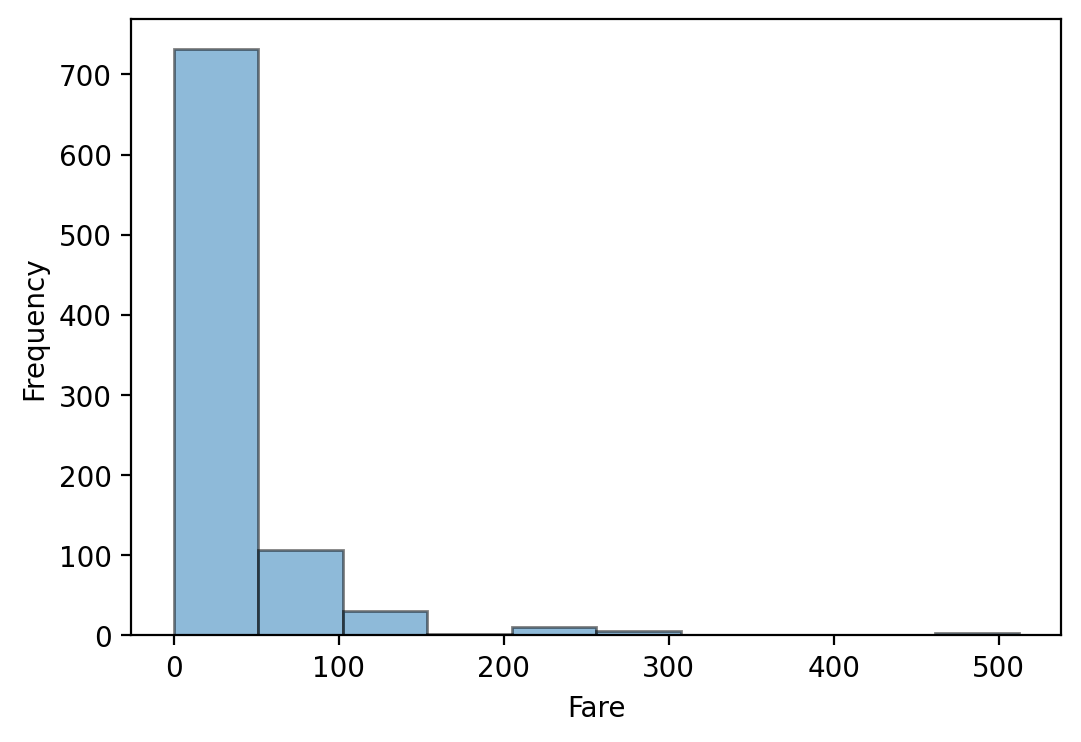

In [52]:
plt.hist(x='Fare', data=titanic, ec='k', alpha=0.5)
# plt.hist(x=titanic['Fare'], ec='k')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

- **Seaborn**의 **histplot()** 함수로 Histogram을 그립니다.

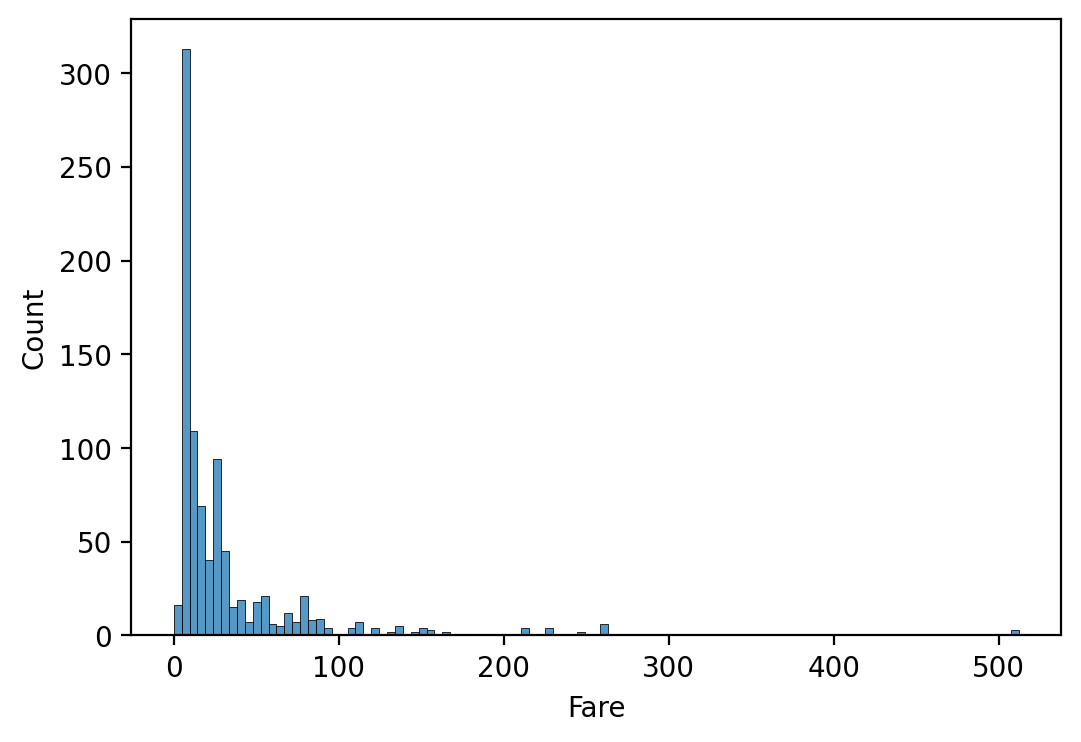

In [17]:
sns.histplot(x='Fare', data=titanic)
plt.show()

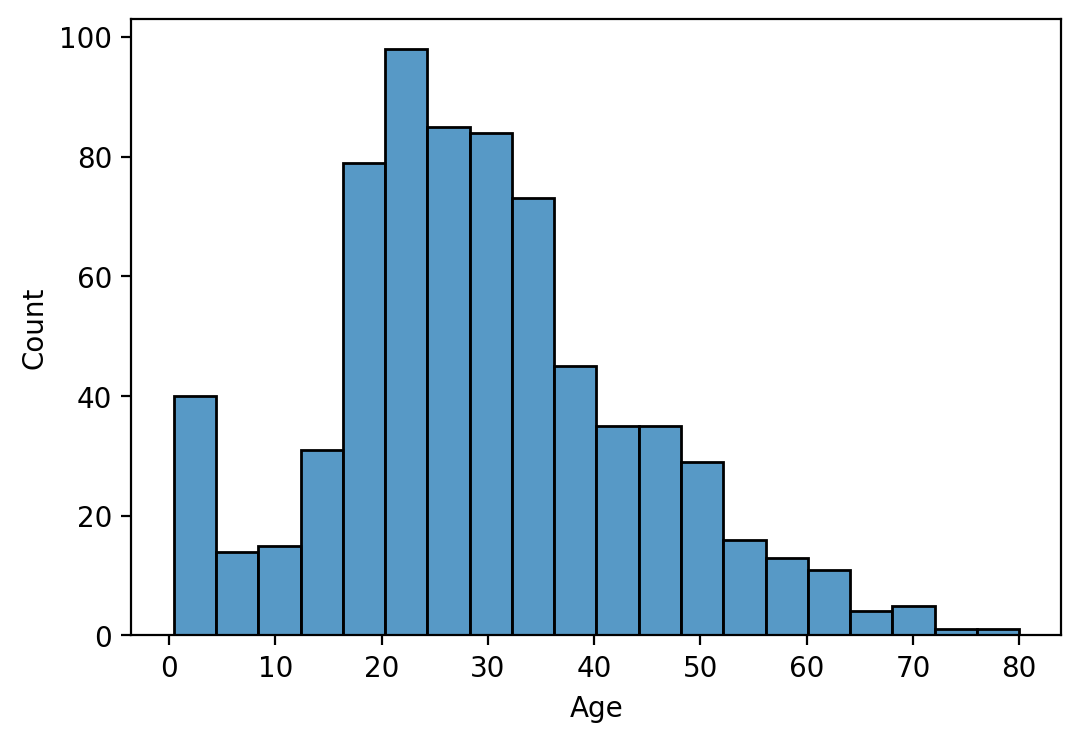

In [18]:
sns.histplot(x='Age', data=titanic)
plt.show()

- **bins** 옵션을 사용해 구간 개수를 적절히 지정합니다.

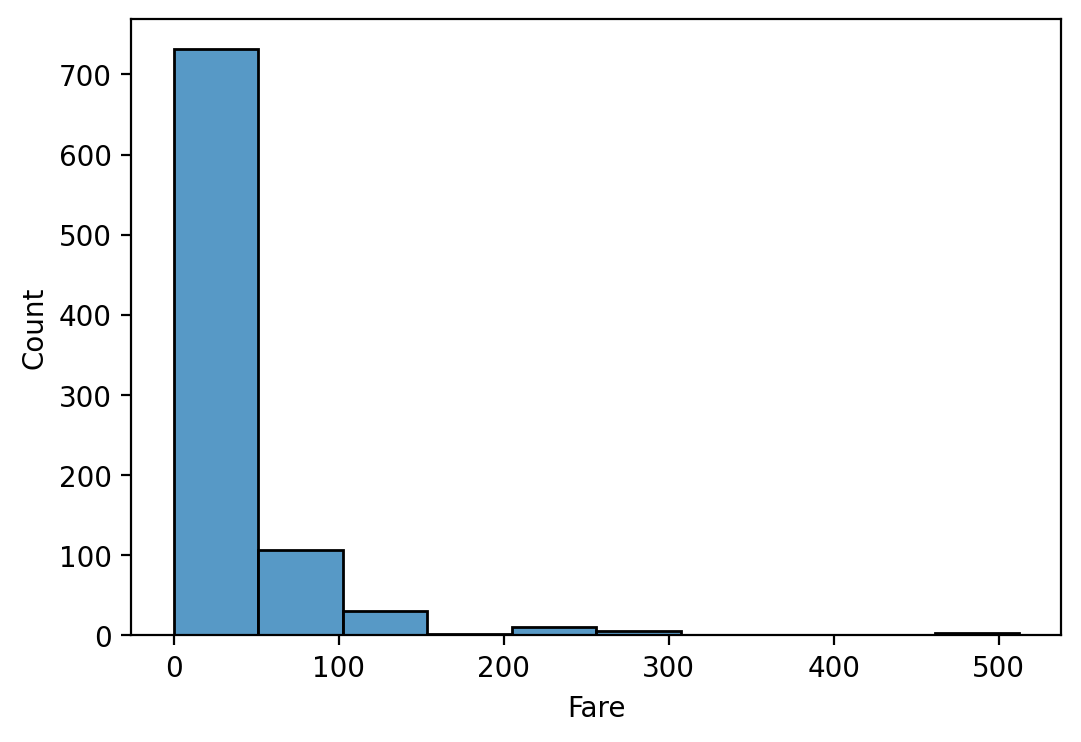

In [53]:
sns.histplot(x='Fare', data=titanic, bins=10)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

air 데이터프레임의 다음 변수들을 Seaborn의 histplot() 함수로 시각화해 데이터 분포를 확인하세요.

**1️⃣ Ozone**

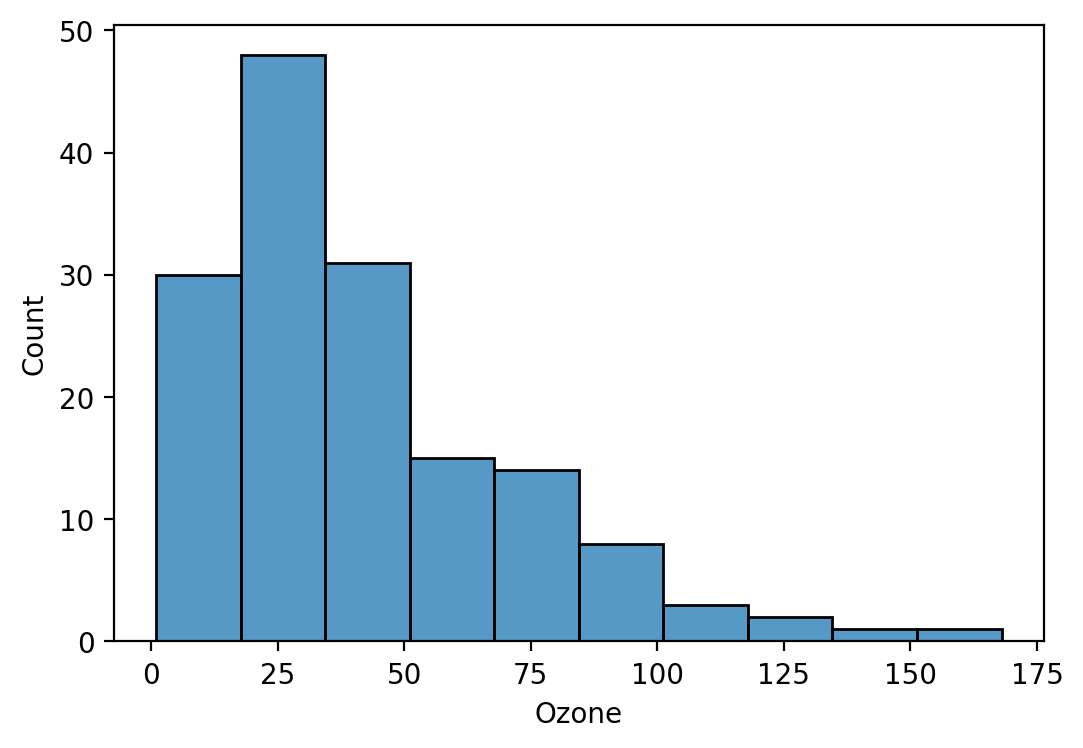

In [55]:
sns.histplot(x=air['Ozone'], bins=10)
plt.show()


**2️⃣ Temp**

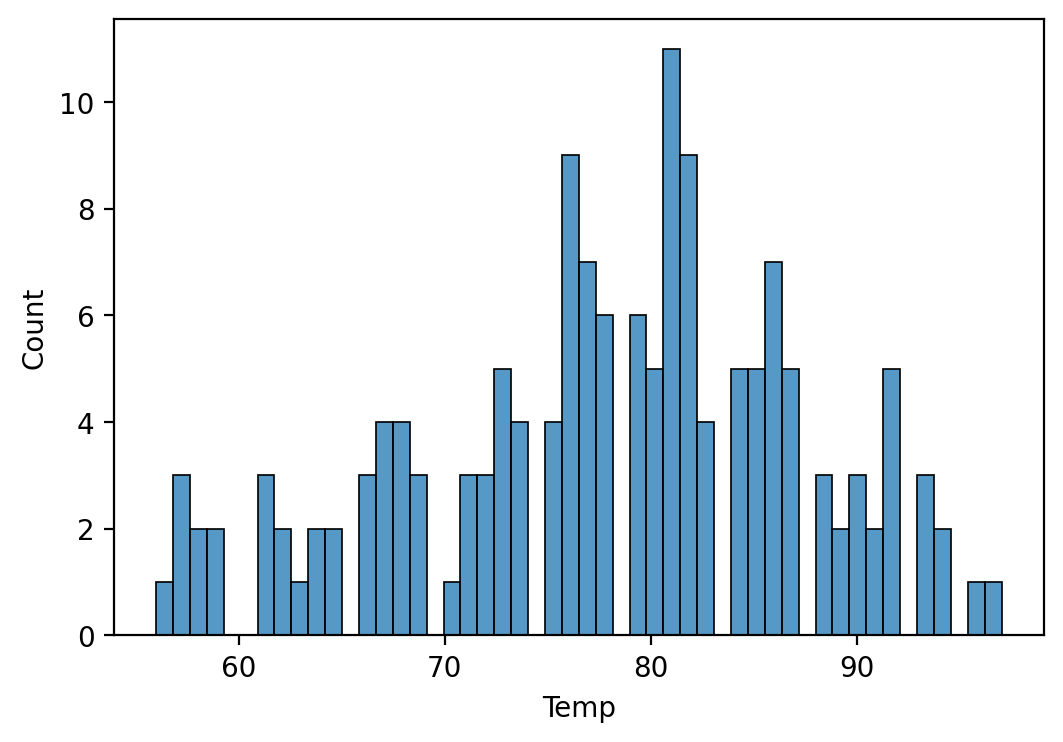

In [60]:
sns.histplot(x='Temp', data=air, bins=50)
plt.show()


**3️⃣ Wind**

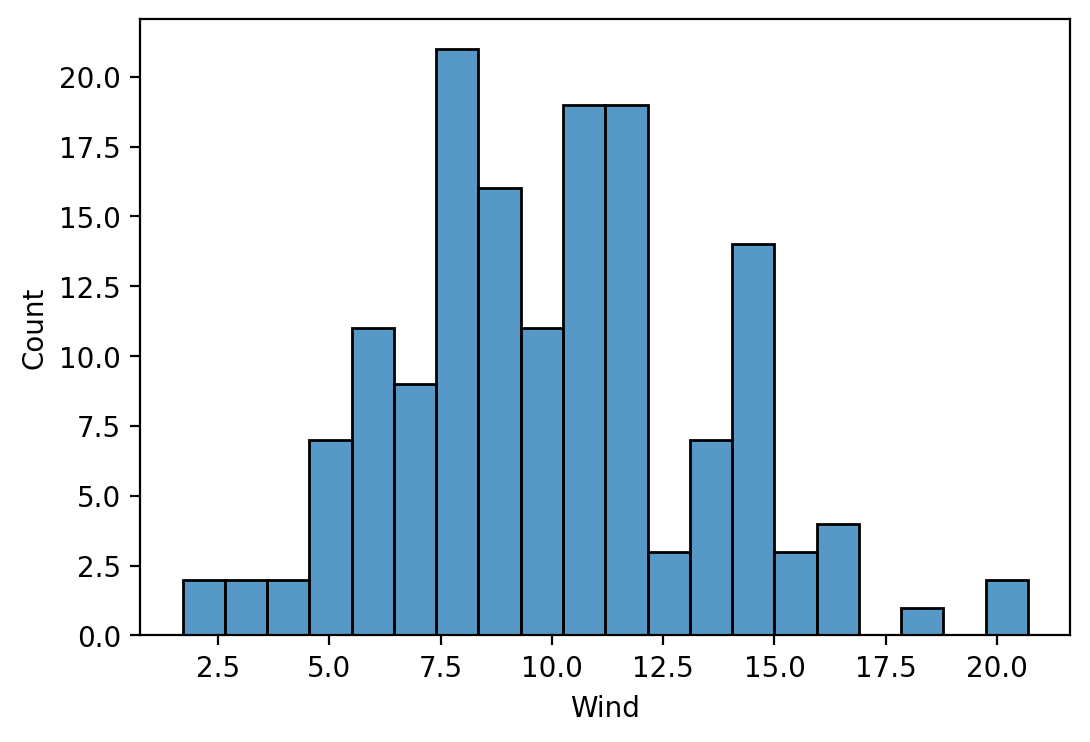

In [61]:
sns.histplot(x='Wind', data=air, bins=20)
plt.show()


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

### **3.2. Density Plot**

- HIstogram은 bins 옵션에 지정한 구간 개수에 따라 전혀 다른 모양이 될 수 있습니다.
- Density Plot을 사용해 이러한 문제를 해결할 수 있습니다.
- Density Plot은 모든 점에서 데이터 밀도를 추정하는 커널밀도추정 방식을 사용합니다.
- Density Plot 곡선 아래 면적은 1이 됩니다.
- **Pandas**가 제공하는 **plot()** 메소드에 **kind='kde'** 를 지정해 Density Plot을 쉽게 그릴 수 있습니다.

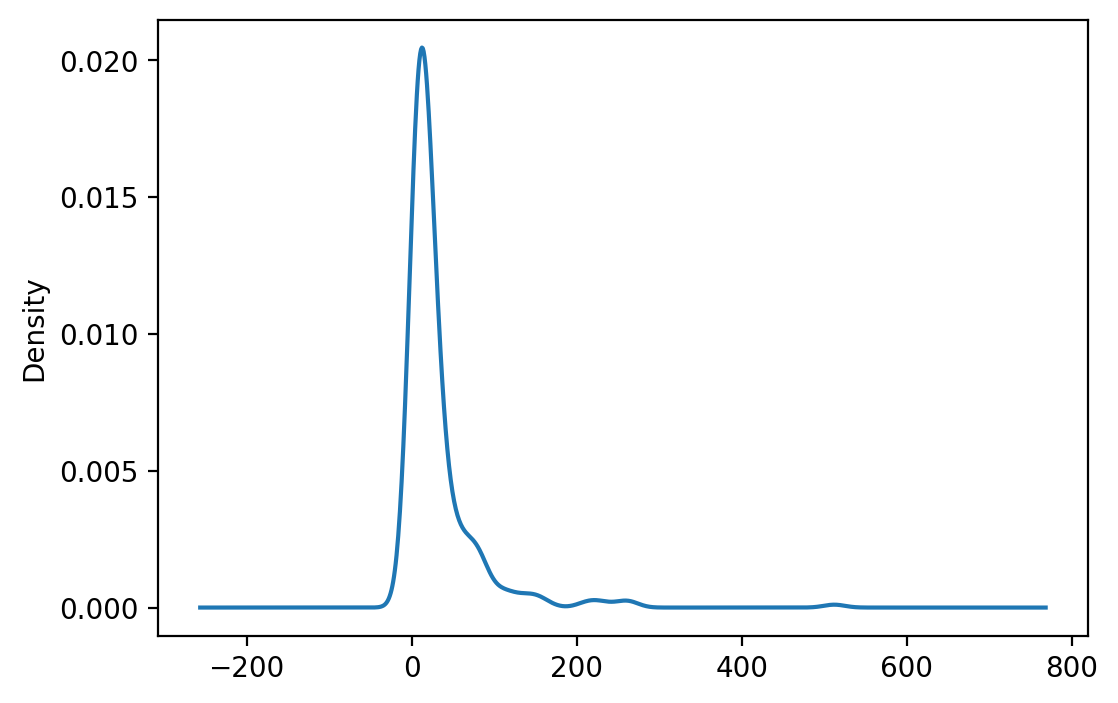

In [63]:
titanic['Fare'].plot(kind='kde')
plt.show()

- **Seaborn**의 **kdeplot()** 함수를 사용해 Density Plot을 그립니다.

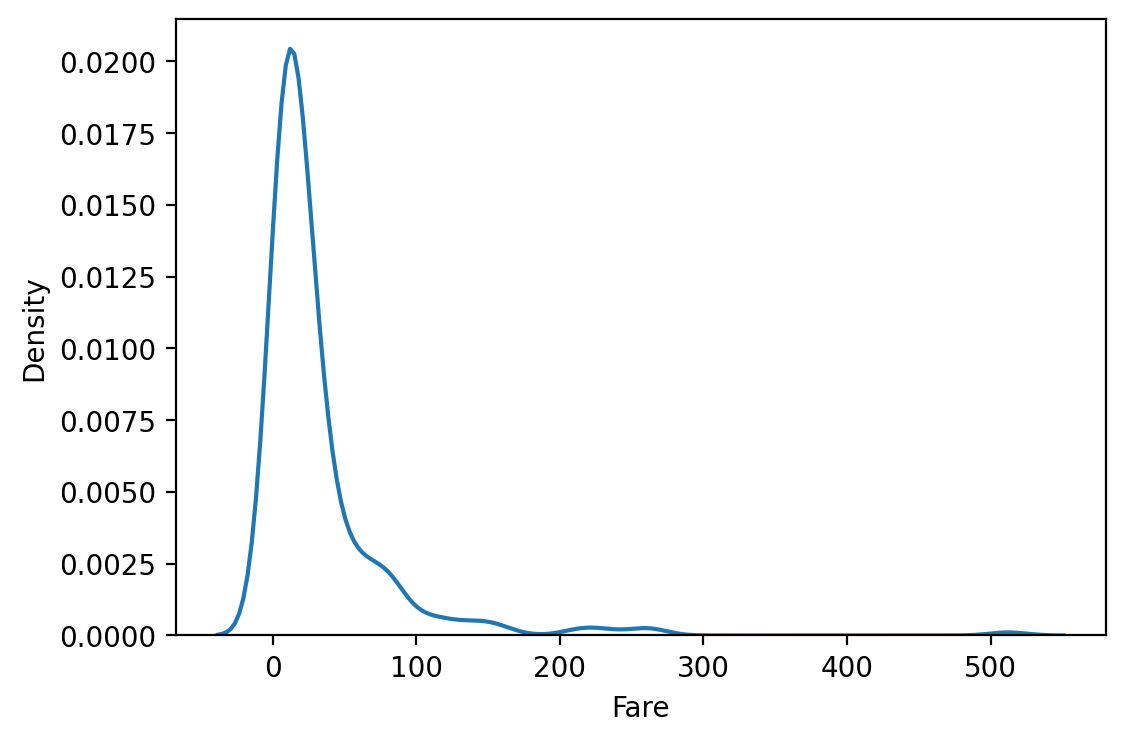

In [21]:
sns.kdeplot(x='Fare', data=titanic)
plt.show()

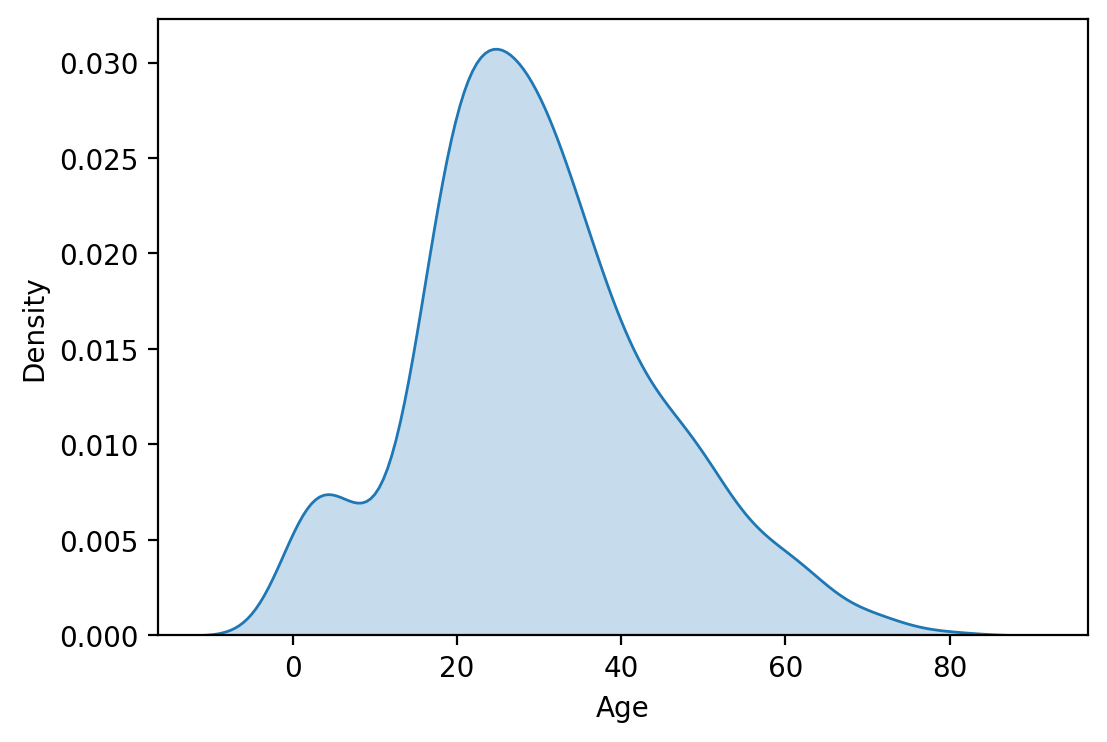

In [64]:
sns.kdeplot(x='Age', data=titanic, fill=True)
plt.show()

**📌 확률 밀도 함수**

- 셀 수 있는 값의 분포, 즉 **이산 확률 분포**는 표로 표현 할 수 있습니다.
- 예를 들면 주사위를 던져 1 ~ 6이 나올 수 있는 확률을 표로 표현할 수 있습니다.
- 반면에 셀 수 없는 값의 분포, 즉 **연속 확률 분포**는 대상 값이 너무 많아 표로 표현할 수 없습니다.
- 그래서 연속 확률 분포는 **함수**, 즉 **그래프**로 표현합니다.
- 예를 들어 키가 140~180 사이인 학생들의 키 분포는 다음과 같이 표현할 수 있습니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/density.png' width=500 align="left"/>

- 만일 키가 a~b 사이일 확률을 구하고자 한다면 위 그래프에 색이 채워진 영역의 면적입니다.
- 그 면적이 0.4라고 한다면, 이는 40%의 확률을 의미합니다.
- 그래프 전체 면적은 1, 즉 100%가 됩니다.
- 이때 사용된 함수를 **확률 밀도 함수(probability density function)** 라고 부릅니다.

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

air 데이터프레임의 다음 변수들을 Seaborn의 kdeplot() 함수로 시각화해 데이터 분포를 확인하세요.

**1️⃣ Ozone**

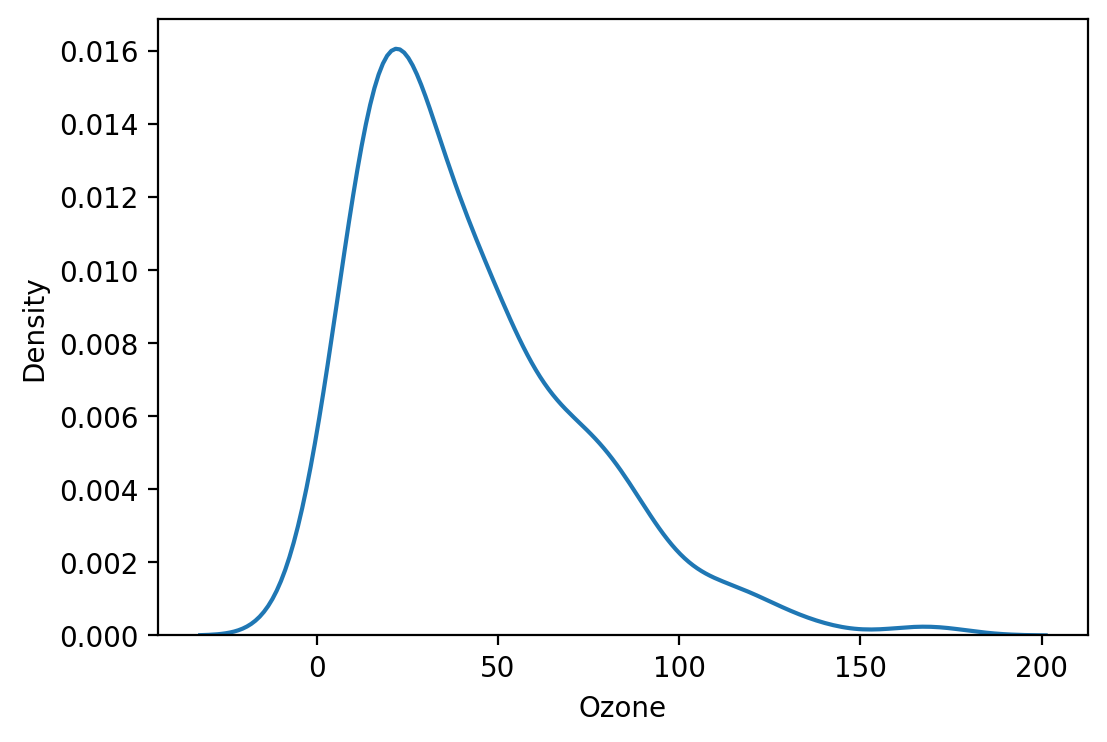

In [65]:
sns.kdeplot(x='Ozone', data=air)
plt.show()


**2️⃣ Temp**

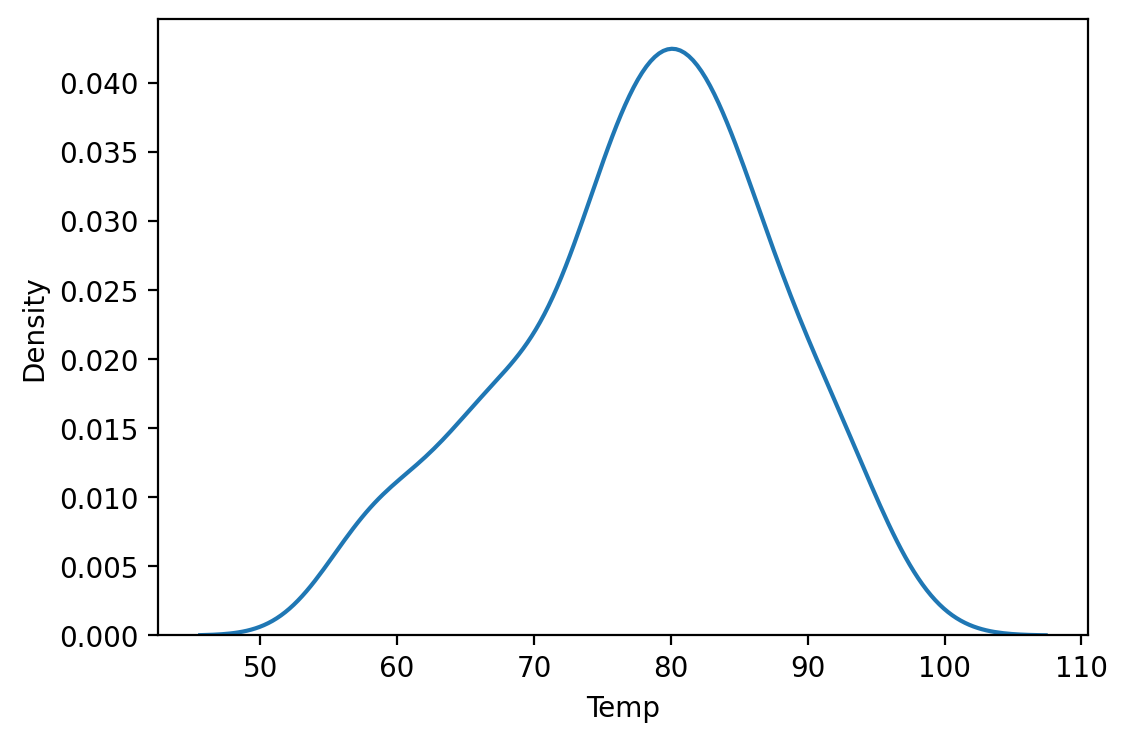

In [67]:
sns.kdeplot(x='Temp', data=air)
plt.show()


**3️⃣ Wind**

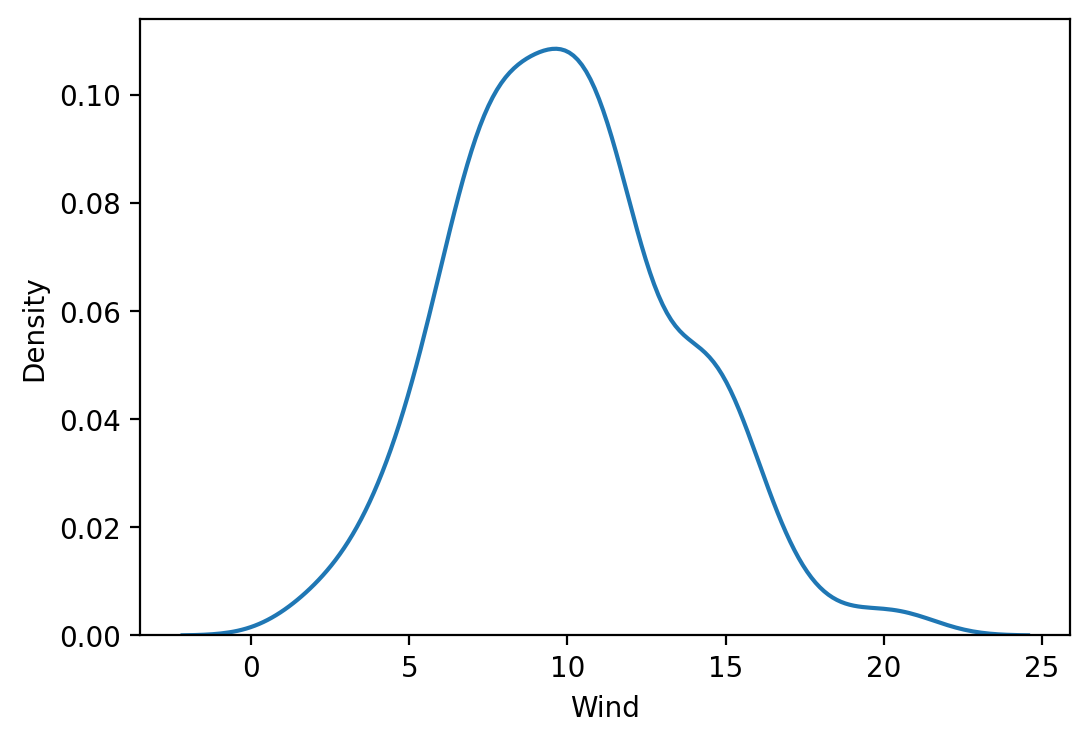

In [68]:
sns.kdeplot(x='Wind', data=air)
plt.show()


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

### **3.3. Box Plot**

- Box Plot은 이해하기가 다소 어렵지만, 데이터 분포를 확인하는 유익한 시각화 도구입니다.
- **Matplotlib**의 **boxplot()** 함수를 사용해 Box Plot을 그립니다.

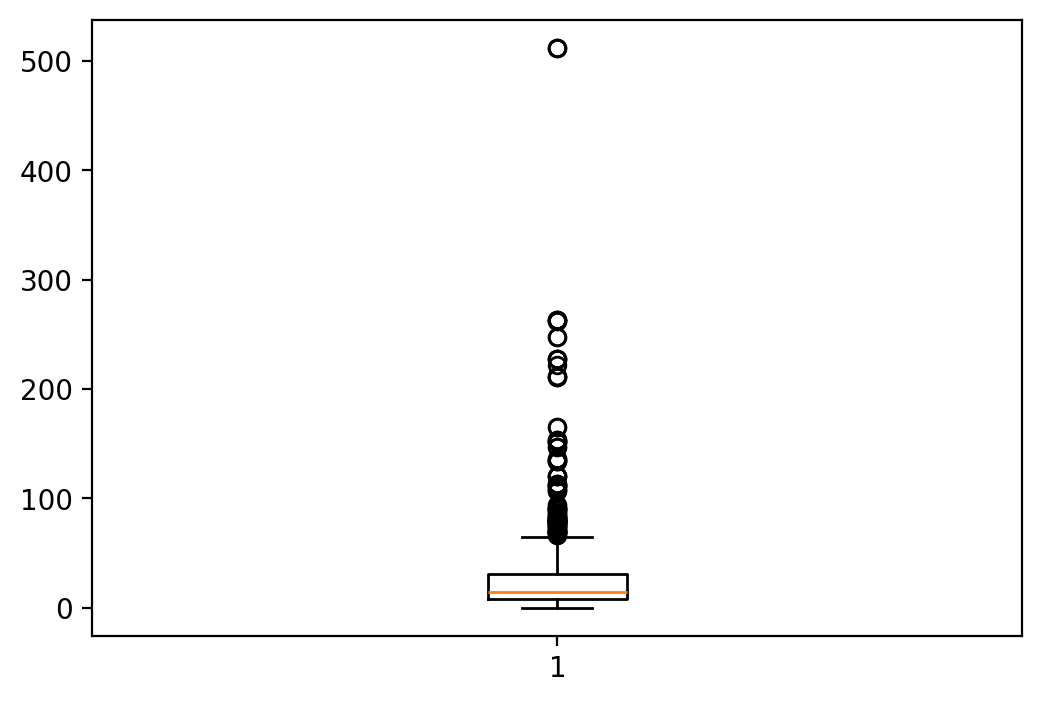

In [23]:
plt.boxplot(x='Fare', data=titanic)
plt.show()

- **주의**: 결측치가 있으면 그래프가 그려지지 않습니다.

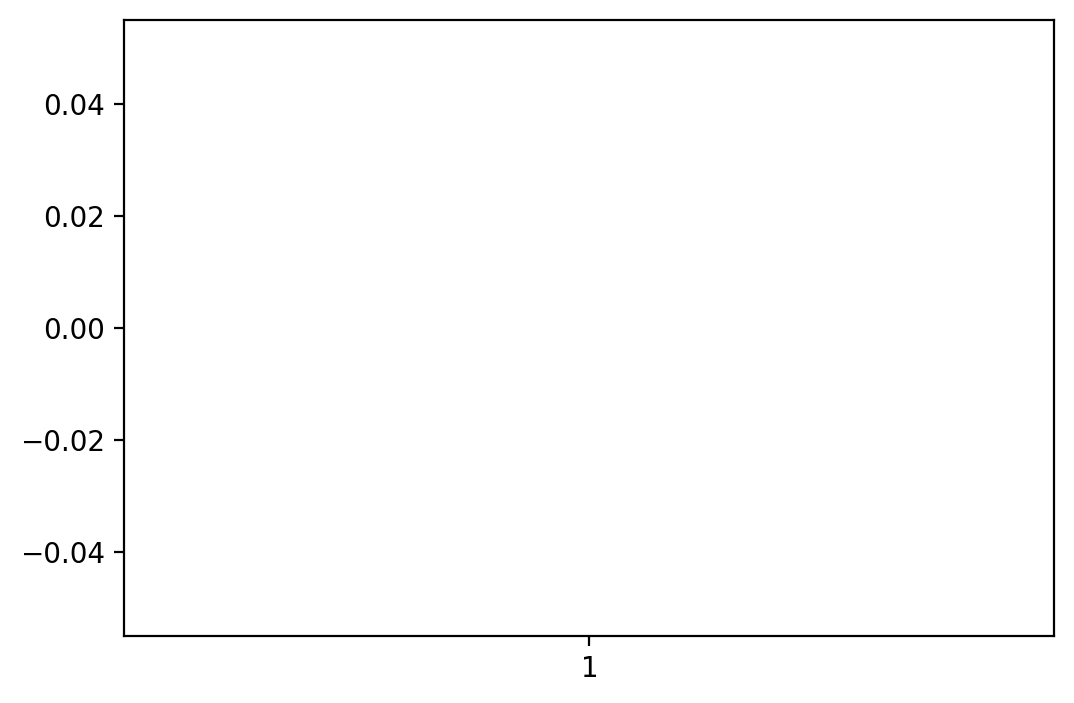

In [24]:
plt.boxplot(x='Age', data=titanic)
plt.show()

- **Seaborn**의 **boxplot()** 함수를 사용해 Box Plot을 그립니다.

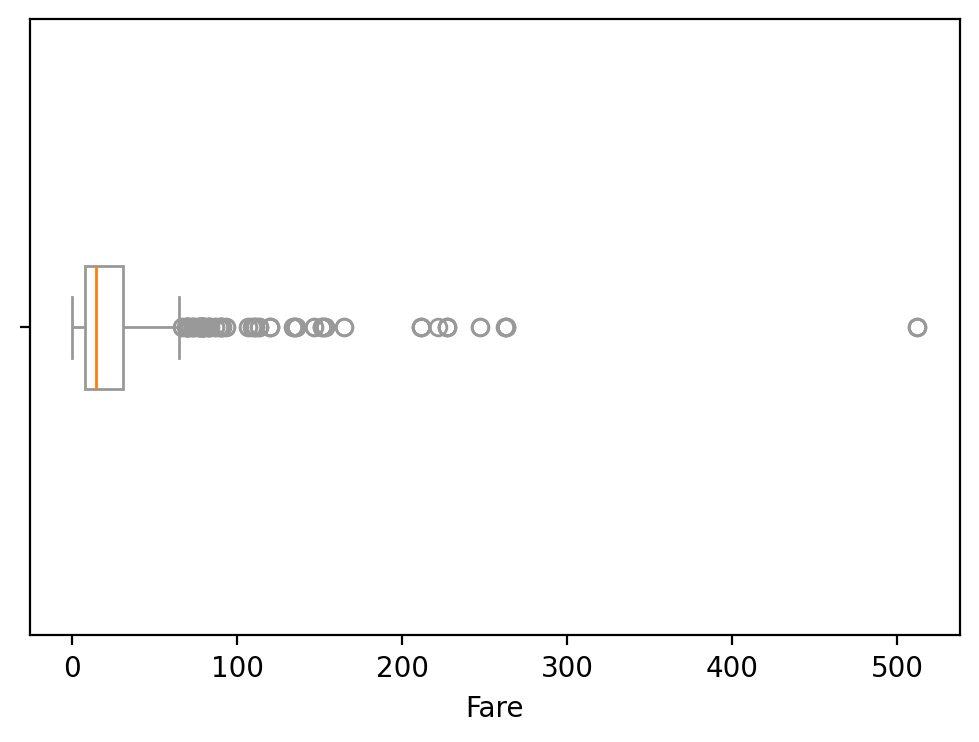

In [72]:
sns.boxplot(x='Fare', data=titanic, width=0.2, color='w', medianprops={'color': 'tab:orange'})
plt.show()

- 결측치가 있어도 그려집니다.

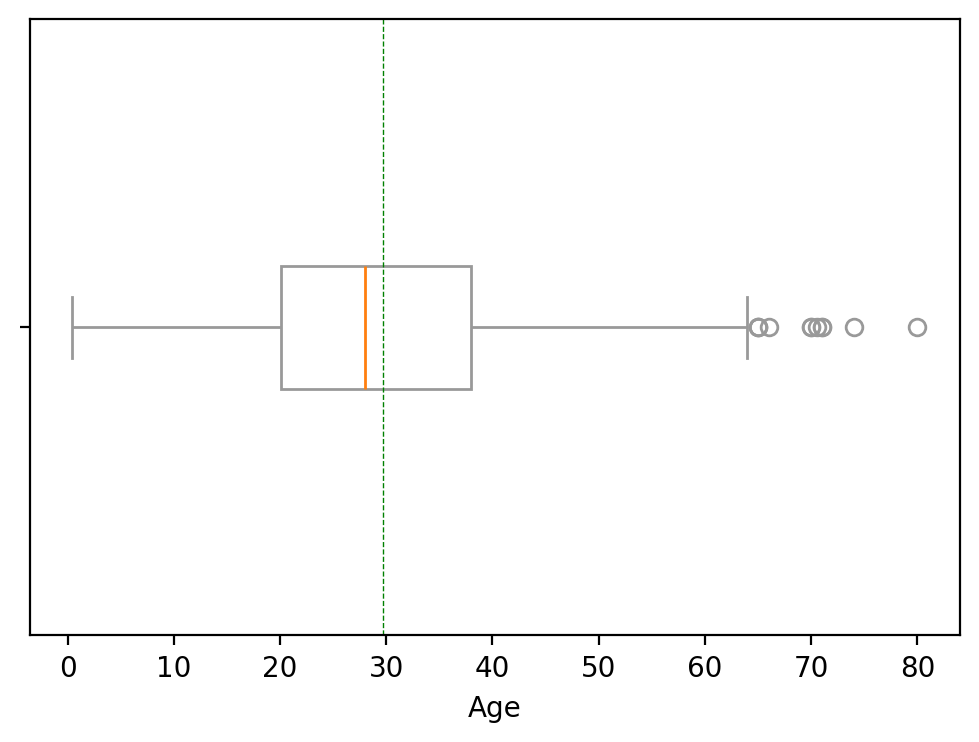

In [78]:
sns.boxplot(x='Age', data=titanic, width=0.2, color='w', medianprops={'color': 'tab:orange'})
plt.axvline(titanic['Age'].mean(), color='g', linewidth=0.5, linestyle='--')
plt.show()

- 다음과 같이 세로 방향으로 표시할 수 있습니다.

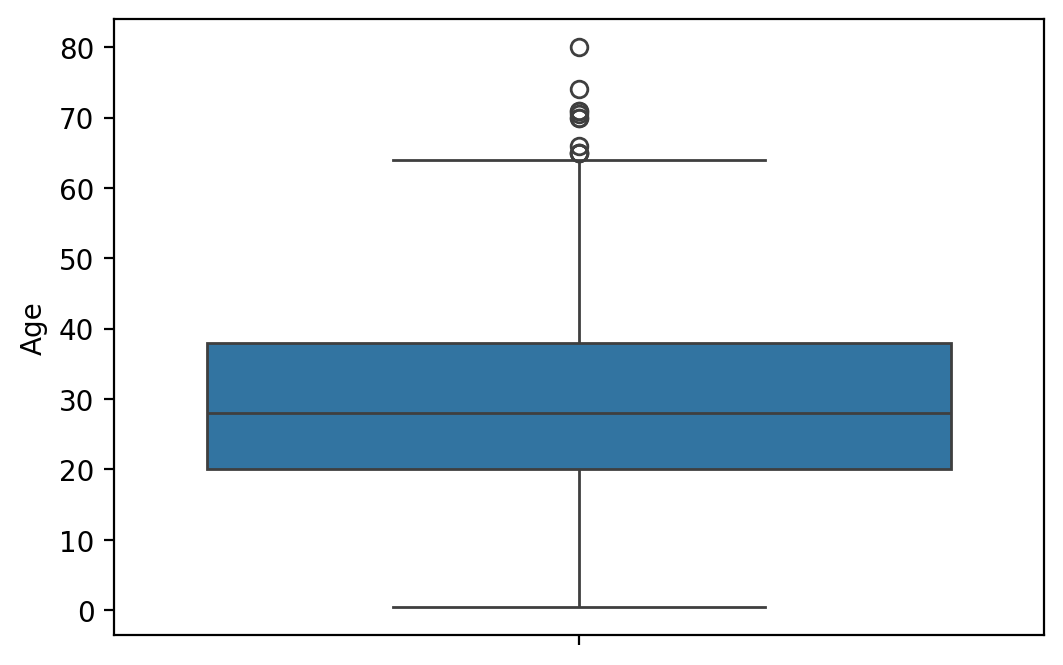

In [27]:
sns.boxplot(y='Age', data=titanic)
plt.show()

**📌 박스플롯의 의미**

<img src='https://raw.githubusercontent.com/jangrae/img/master/boxplot03.png' width=800 align="left"/>

- Histogram과 Bax Plot을 같이 그리면 데이터를 더 쉽게 파악할 수 있습니다.

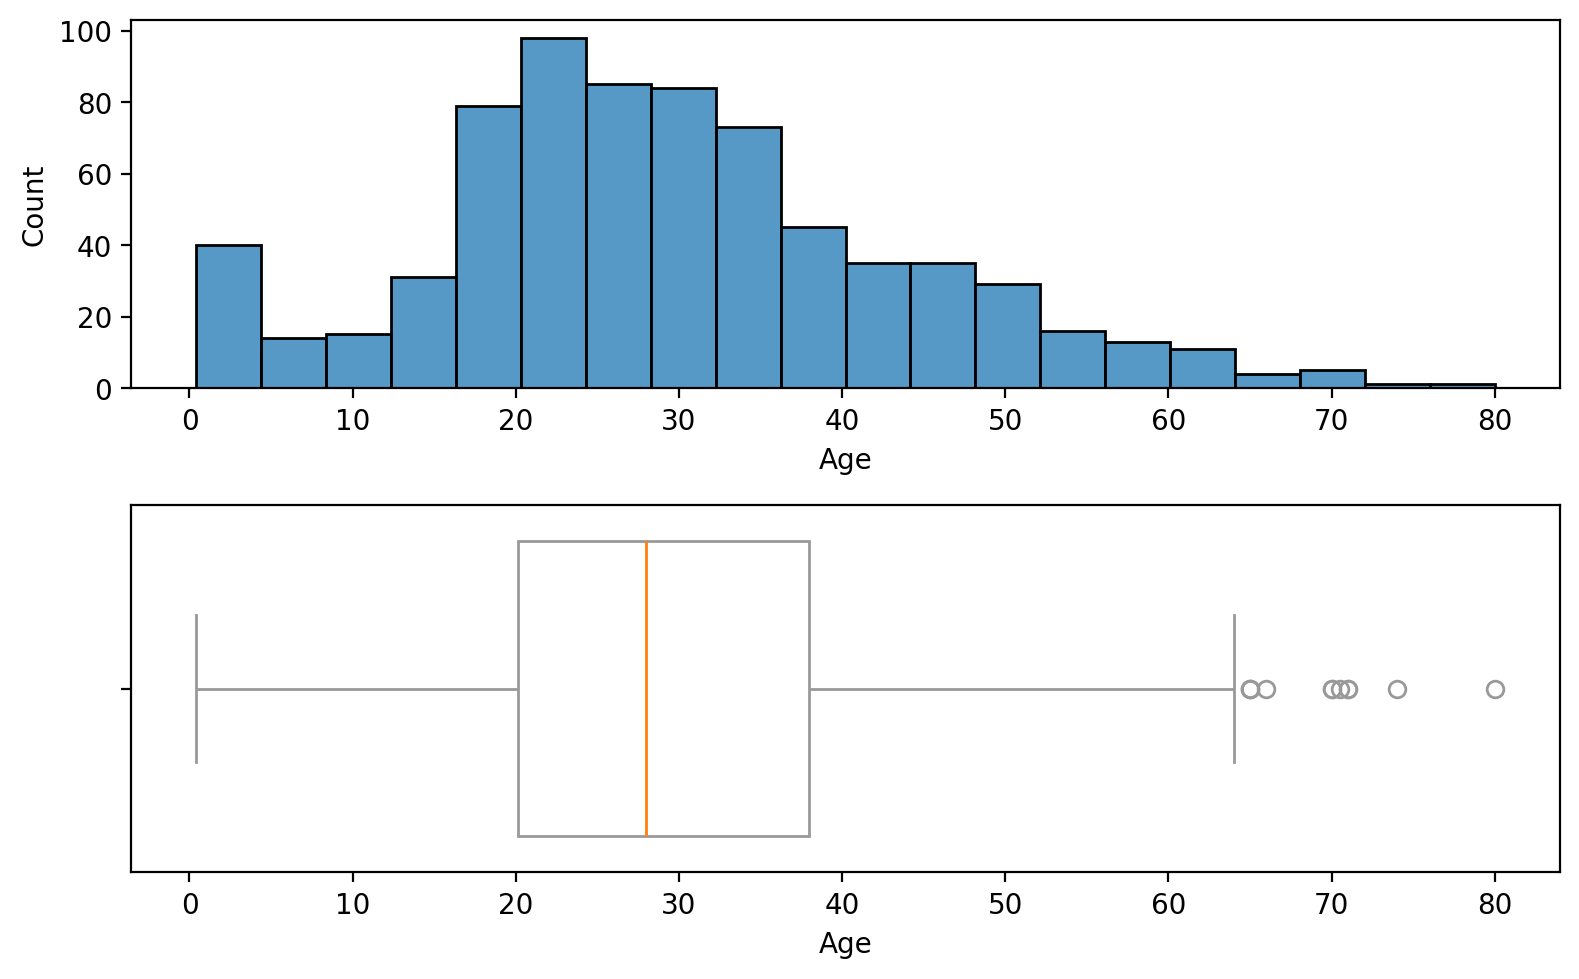

In [28]:
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
sns.histplot(x='Age', bins=20, data=titanic)

plt.subplot(2, 1, 2)
sns.boxplot(x='Age', data=titanic, color='w', medianprops={'color': 'tab:orange'})

plt.tight_layout()
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

air 데이터프레임의 다음 변수들을 Seaborn의 boxplot() 함수로 시각화해 데이터 분포를 확인하세요.

**1️⃣ Ozone**

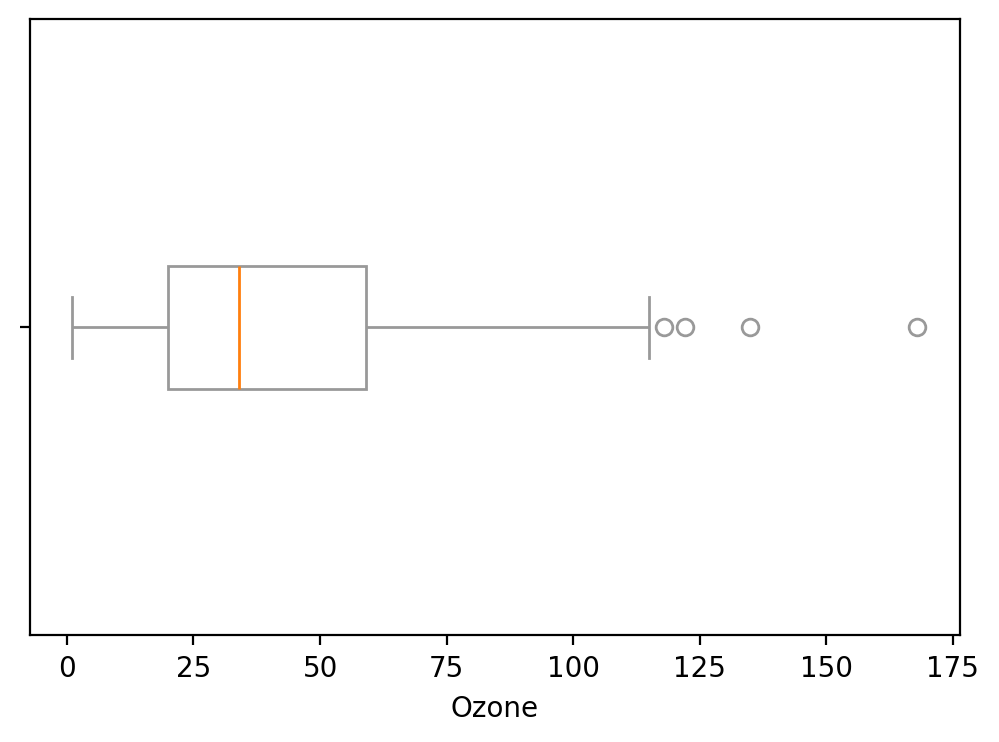

In [80]:
sns.boxplot(x='Ozone', data=air, width=0.2, color='w', medianprops={'color': 'tab:orange'})
plt.show()

**2️⃣ Temp**

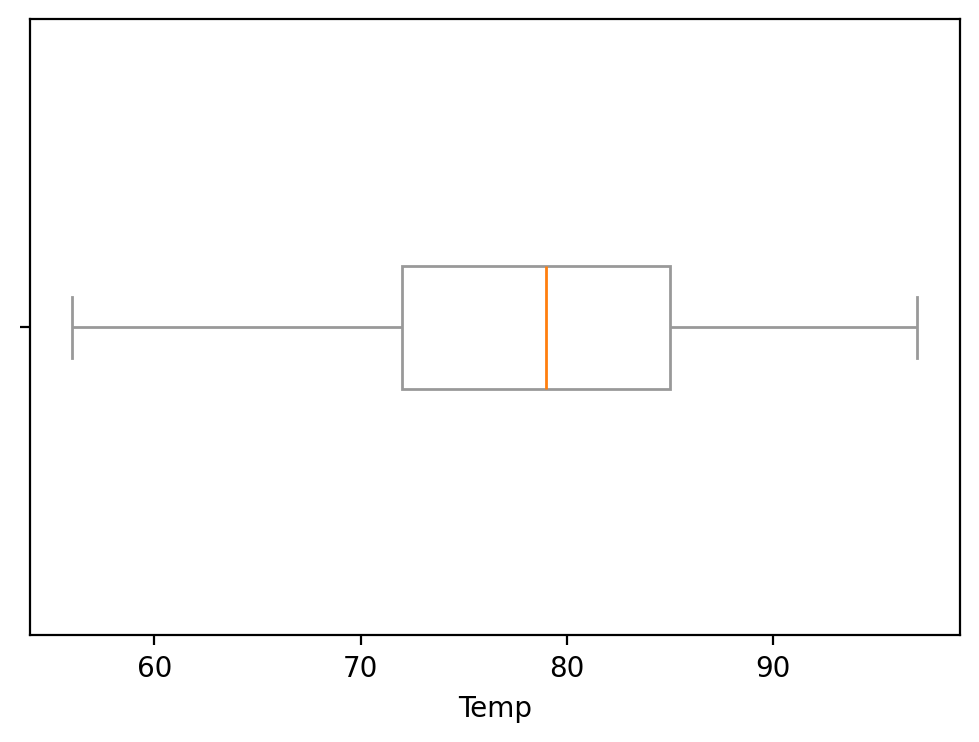

In [81]:
sns.boxplot(x='Temp', data=air, width=0.2, color='w', medianprops={'color': 'tab:orange'})
plt.show()

**3️⃣ Wind**

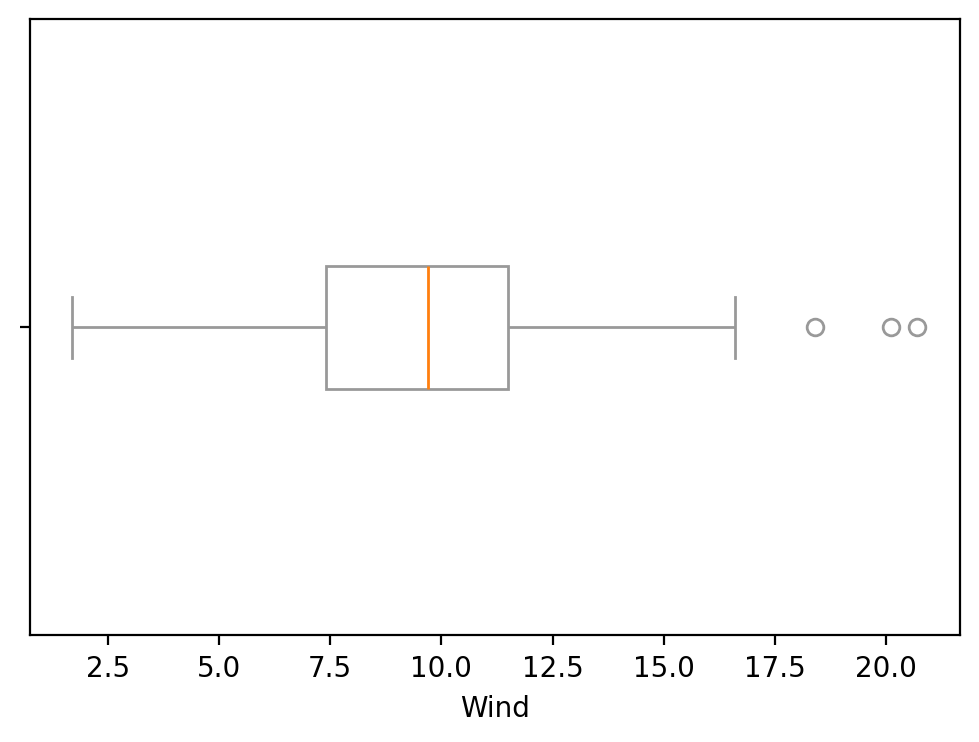

In [82]:
sns.boxplot(x='Wind', data=air, width=0.2, color='w', medianprops={'color': 'tab:orange'})
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

### **3.4. 시계열 데이터 시각화**

- 시계열 데이터는 보통 시간 축(x축)에 맞게 값들을 선 그래프로 표현합니다.
- **Matplotlib**의 **plot()** 함수를 사용해 Line Plot을 그립니다.

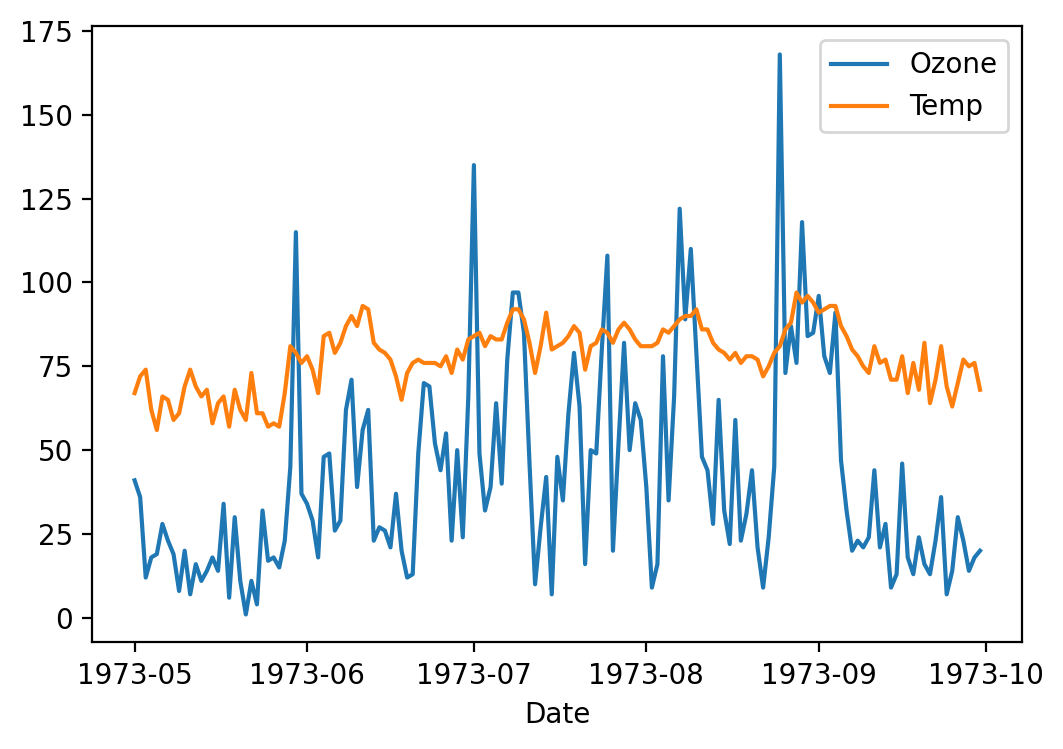

In [29]:
air['Date'] = pd.to_datetime(air['Date'])

plt.plot('Date', 'Ozone', data=air, label='Ozone')
plt.plot('Date', 'Temp', data=air, label='Temp')
plt.xlabel('Date')
plt.legend()
plt.show()

- **Seaborn**의 **lineplot()** 함수를 사용해 Line Plot을 그립니다.

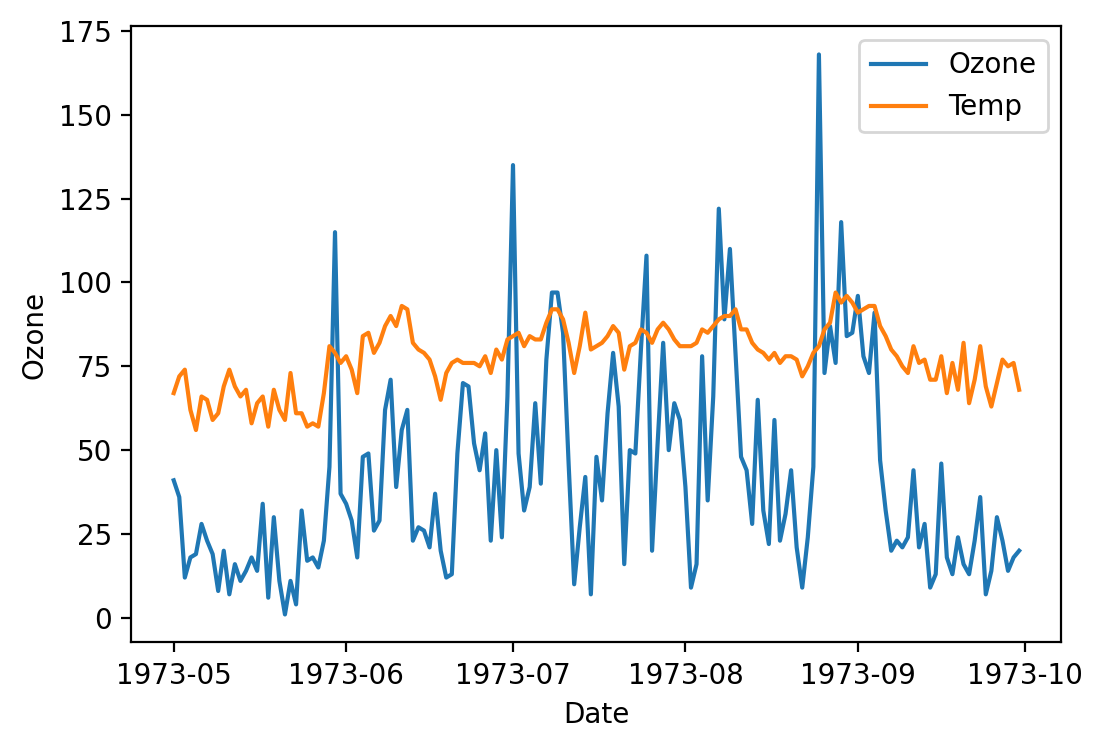

In [85]:
sns.lineplot(x='Date', y='Ozone', data=air, label='Ozone')
sns.lineplot(x='Date', y='Temp', data=air, label='Temp')
# plt.ylabel('Ozone & Temp')
plt.legend()
plt.show()